Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [65]:
df.shape

(10000, 14)

In [66]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8134,8135,15761783,Shah,577,France,Male,41,6,0.00,1,1,1,167621.18,0
889,890,15600462,Barwell,542,France,Female,43,8,145618.37,1,0,1,10350.74,0
115,116,15675522,Ko,628,Germany,Female,30,9,132351.29,2,1,1,74169.13,0


In [67]:
# Here we can unimportant columns that are not useful to predict is customer is Exited or Not we will drop this columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [68]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5207,777,Germany,Female,37,10,121532.17,2,1,1,73464.88,0
9740,798,Germany,Female,29,8,80204.11,2,1,0,70223.22,0
7723,691,Spain,Male,35,6,0.00,2,0,1,178038.17,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [70]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [71]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

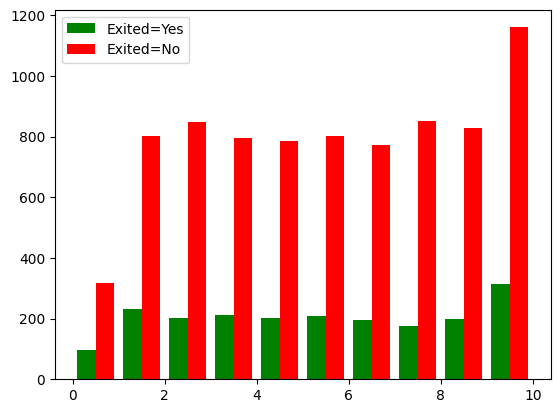

In [72]:
# We can find correlation between columns
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel=("tenure")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Exited=Yes', 'Exited=No'])
plt.legend()
plt.show()

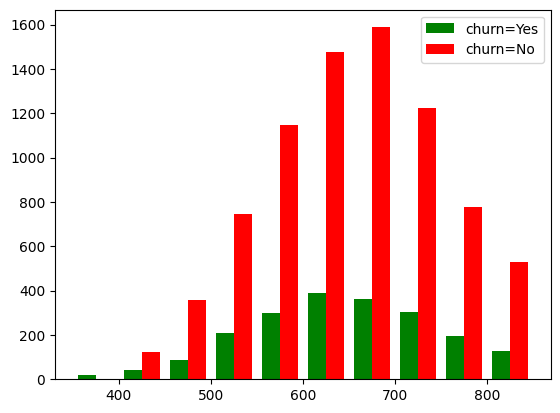

In [73]:
# We can find correlation between columns
tenure_churn_no = df[df.Exited==0].CreditScore
tenure_churn_yes = df[df.Exited==1].CreditScore

plt.xlabel=("tenure")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()
plt.show()

In [74]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
31,533,France,Male,36,7,85311.70,1,0,1,156731.91,0
2250,706,Spain,Male,20,8,0.00,2,1,1,12368.11,0
8718,589,France,Male,37,7,85146.48,2,1,0,86490.09,1


In [75]:
df1 = pd.get_dummies(data=df, columns = ['Geography','Gender']).astype(int)

In [76]:
df1.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4167,850,34,8,199229,1,0,0,68106,0,0,0,1,0,1
8629,651,23,4,115636,2,1,0,70400,0,0,0,1,0,1
1857,544,29,1,118560,1,1,1,164137,0,1,0,0,1,0


In [77]:
df1['IsActiveMember'].unique()

array([1, 0])

In [78]:
df1['HasCrCard'].unique()

array([1, 0])

In [79]:
df1['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [80]:
col_to_scale = ['NumOfProducts','Balance','CreditScore','Age','Tenure','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [83]:
df1.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8919,0.646,0.189189,0.8,0.483224,0.0,1,0,0.584846,0,1,0,0,0,1
42,0.412,0.581081,0.2,0.467995,0.0,1,1,0.470755,0,1,0,0,1,0
4039,0.258,0.121622,0.2,0.687383,0.0,1,1,0.201539,0,0,0,1,0,1


In [85]:
x = df1.drop(columns = ['Exited'])
y = df1['Exited']

In [86]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0,1,0
1,0.516,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1,1,0
2,0.304,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,1,0
4,1.000,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228655,0.000000,1,1,0.508488,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299225,0.333333,1,0,0.464429,0,1,0,0,1


In [87]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [88]:
import tensorflow as tf

In [89]:
from tensorflow import keras

In [95]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(13,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [97]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4323
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4108
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8199 - loss: 0.4076
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4072
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.3966
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3892
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3856
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3806
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8459 - loss: 0.3684
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8416 - loss: 0.3822
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8401 - loss: 0.3679
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [98]:
model.evaluate(xtrain,ytrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8648 - loss: 0.3280


[0.32783564925193787, 0.8666250109672546]

In [99]:
yp = model.predict(xtest)
yp

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.02973581],
       [0.06331464],
       [0.0501218 ],
       ...,
       [0.01345727],
       [0.01044593],
       [0.04757104]], dtype=float32)

In [100]:
ypred = []
for element in yp:
  if element > 0.5:
    ypred.append(1)
  else:
    ypred.append(0)

In [ ]:
ypred

In [104]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.46      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



<Axes: >

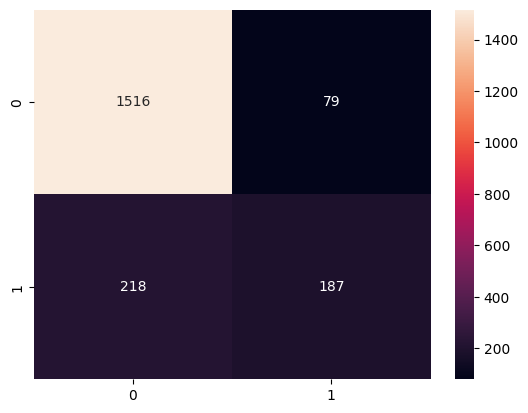

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = tf.math.confusion_matrix(labels=ytest,predictions = ypred)
sns.heatmap(cm, annot=True,fmt='d')

In [107]:
(1516+187)/(1516+187+218+79) # Accuracy of the Model

0.8515